In [80]:
"""Plotting parameters"""
from matplotlib import rcParams
#rcParams['axes.formatter.limits'] = (-7, 7)
rcParams['axes.formatter.limits'] = (-2,3)
rcParams['axes.labelsize'] = 22
rcParams['xtick.labelsize'] = 22
rcParams['ytick.labelsize'] = 22
rcParams['font.size'] = 22
rcParams['lines.linewidth'] = 2

In [77]:
"""Import packages"""
import datetime
import xarray as xr
import numpy as np
import matplotlib.pyplot as pl
import scipy.io as sio
%matplotlib inline

In [8]:
pl.style.use('default')

In [14]:
"""Get data"""

ds = xr.open_dataset('chesapeake_bay_docflux.nc')

Huon = ds.Huon
Huon_DOC = ds.Huon_DOC
DOC = ds.DOC
salt = ds.salt
temp = ds.temp

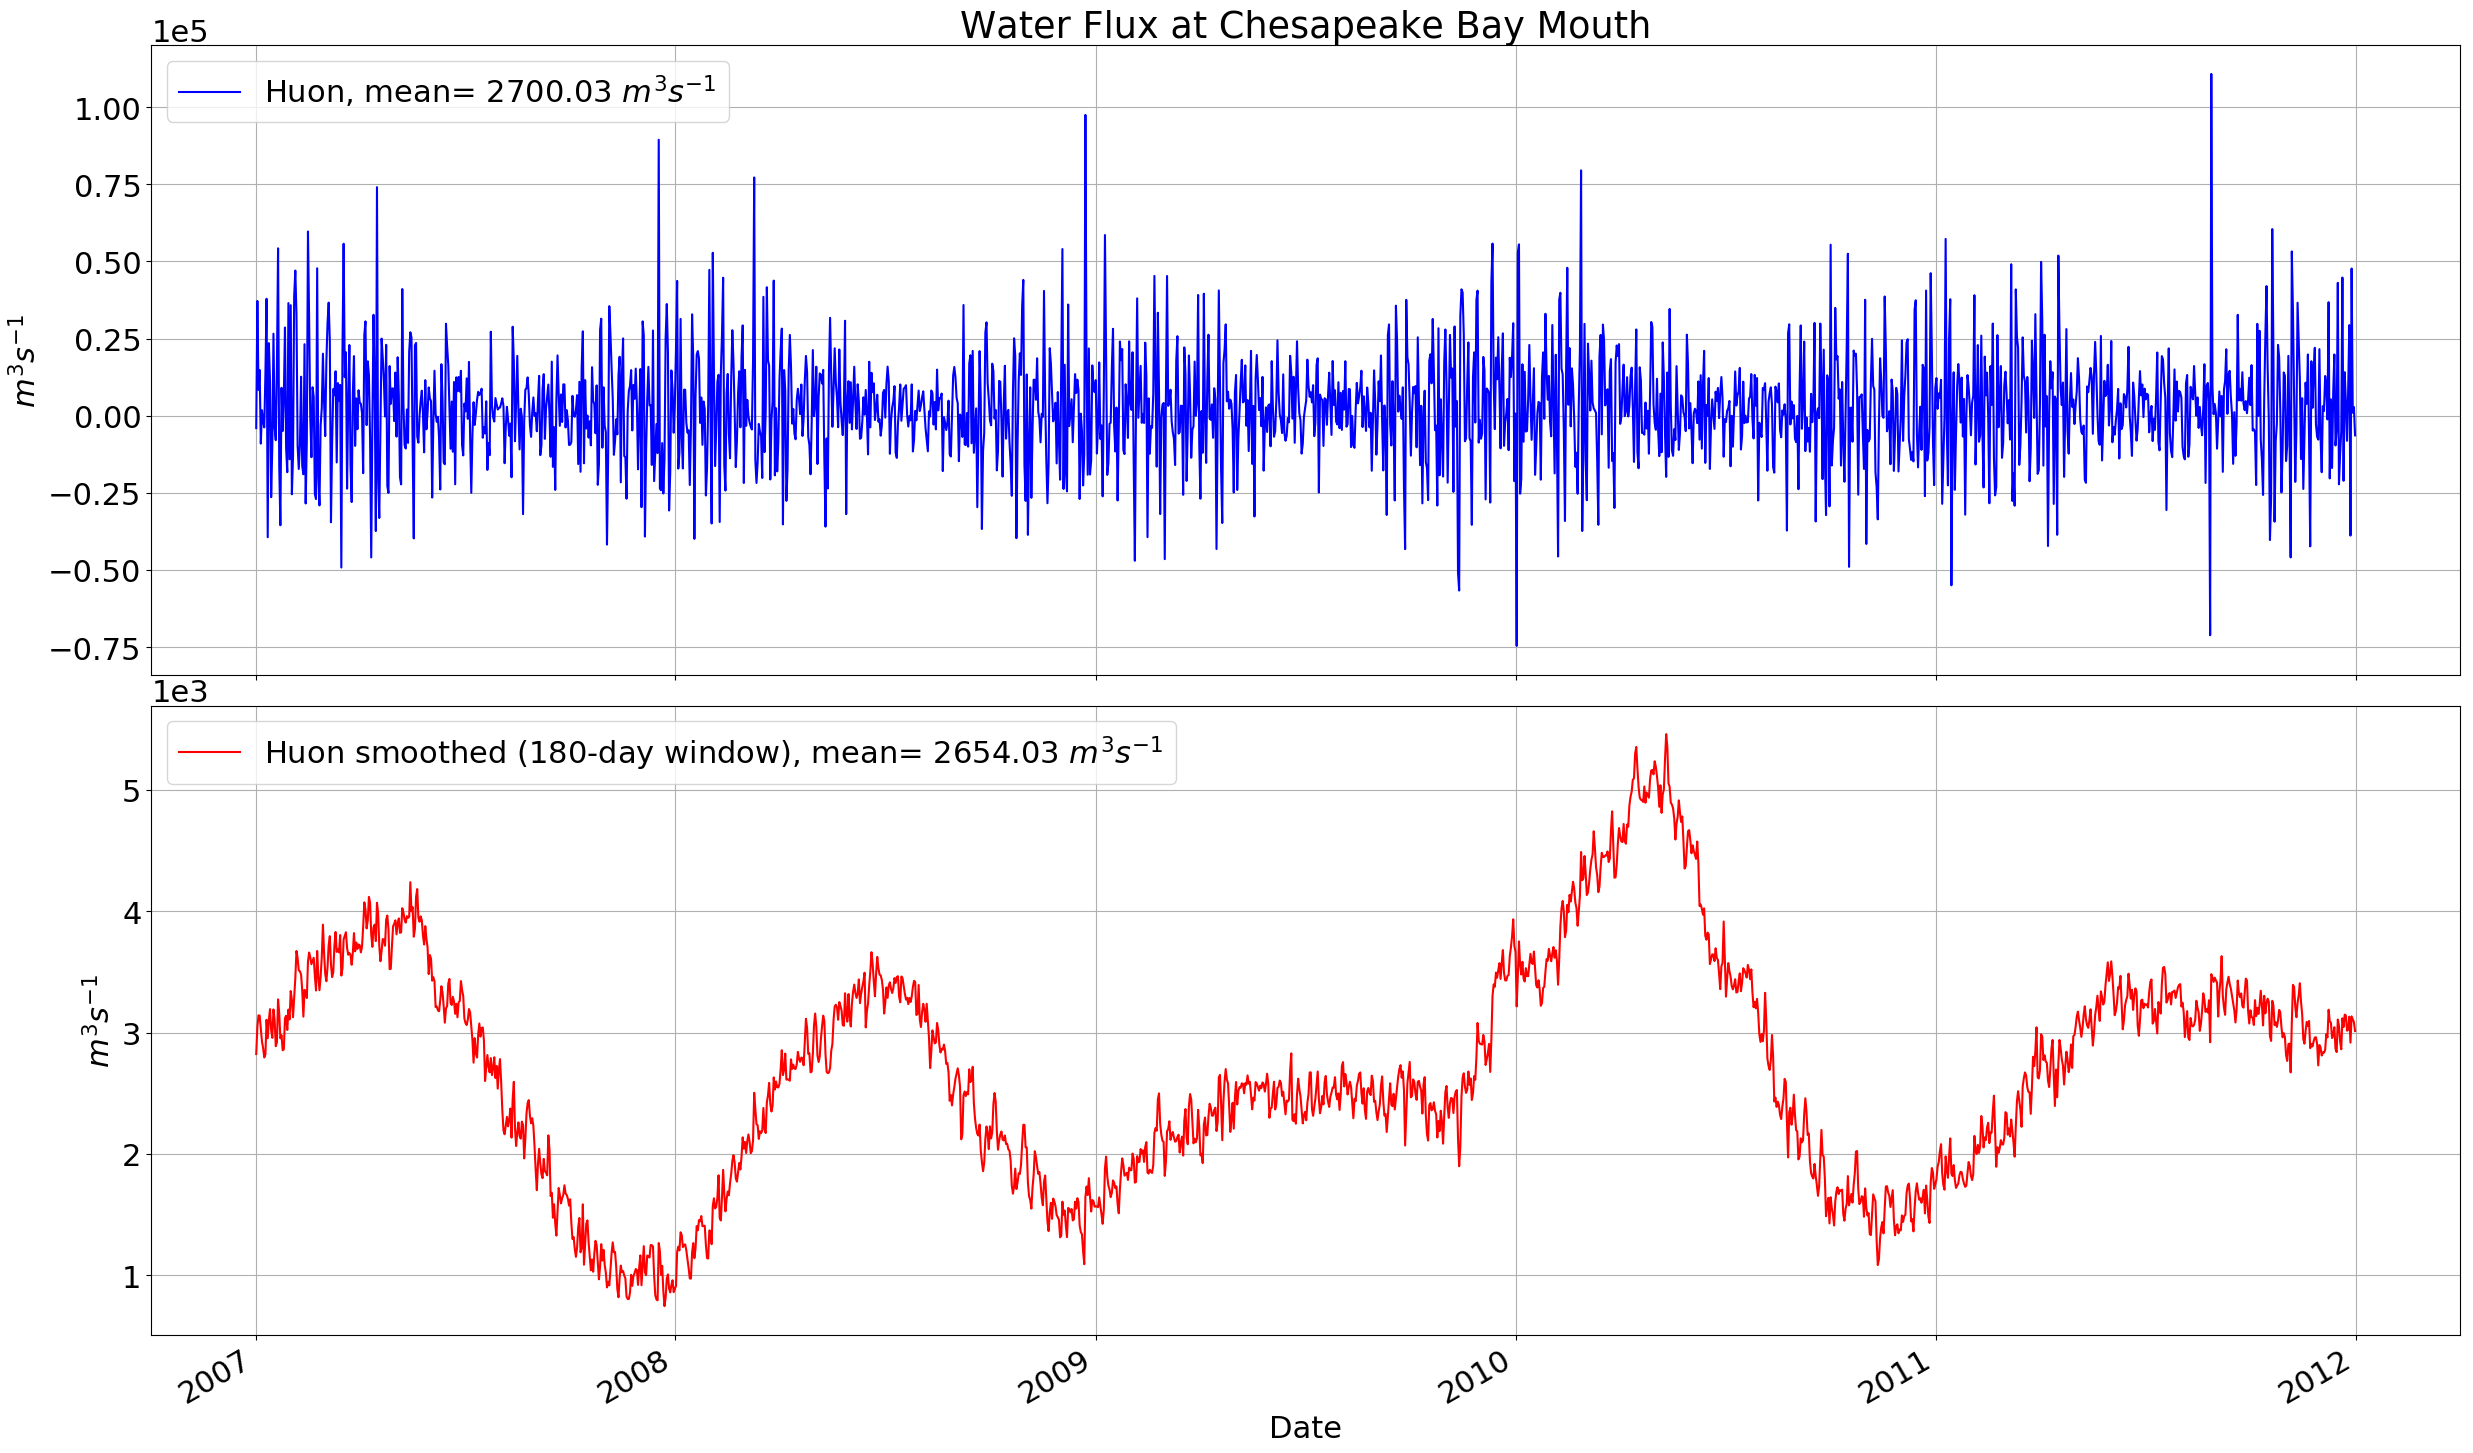

In [27]:
# sum over 2nd axis then sum over first axis
sum_Huon = Huon.sum(axis=2).sum(axis=1)

#rolling mean:
window = 180
sm=sum_Huon.rolling(ocean_time=window).mean()

# to get the dimension names
Huon.dims

# summing over dimensions
sum_Huon2 = Huon.sum(dim=['s_rho', 'eta_u'])

# plotting time series
f, ax = pl.subplots(nrows=2, sharex=True, figsize=(25, 15))
sum_Huon.sel(ocean_time=slice('2007','2011')).plot.line( 'b-', label=f'Huon, mean={float(sum_Huon.mean()): .2f}' + ' $m^3 s^{-1}$', ax=ax[0])
ax[0].set_ylabel('$m^3 s^{-1}$')
ax[0].legend()
ax[0].set_title('Water Flux at Chesapeake Bay Mouth')
ax[0].grid()
sm.sel(ocean_time=slice('2007','2011')).plot.line('r-', label=f'Huon smoothed ({window}-day window), mean={float(sm.mean()): .2f}' + ' $m^3 s^{-1}$', ax=ax[1])
ax[1].set_ylabel('$m^3 s^{-1}$')
ax[1].set_xlabel('Date')
ax[1].legend();
ax[1].grid()
f.tight_layout(h_pad=0.01)

# assert equality of two data arrays
xr.testing.assert_equal(sum_Huon,sum_Huon2)

f.savefig('Figures/Huon_CBM.png',dpi=300)

In [18]:
"""Get the mean Huon in m3/s - positive is seaward"""
np.mean(sum_Huon)

<xarray.DataArray 'Huon' ()>
array(2700.0331634748154)

In [21]:
sum_Huon_DOC = Huon_DOC.sum(dim=['s_rho', 'eta_u'])
"""m3/s x mmol-C/m3 to Tg-C/yr"""
sum_Huon_DOC = sum_Huon_DOC*12*1e-3*86400*365*1e-12

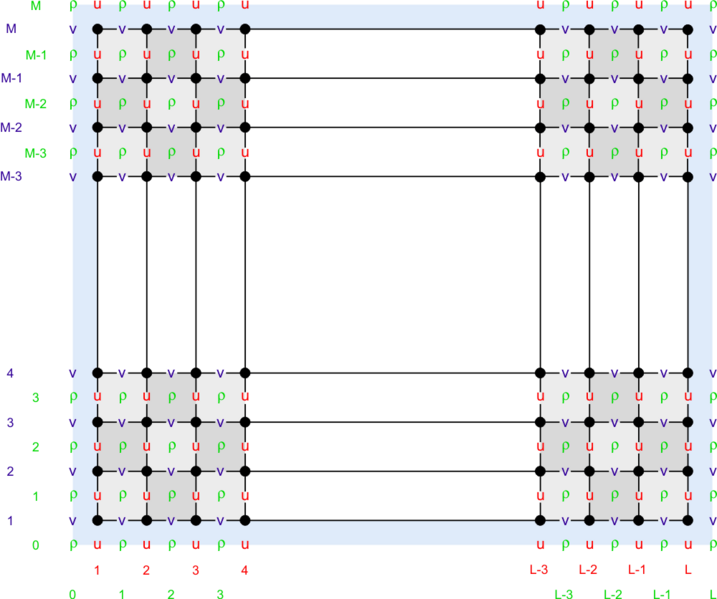

In [23]:
# Horizontal discretization of grid cells - significant for Hvom*DOC calculation 
from IPython.display import Image
Image(filename='../Figures/717px-staggered_grid_rho_cells.png')

In [24]:
# Get Huon*DOC
HuonDOC=np.multiply(Huon, DOC)
sum_HuonDOC = HuonDOC.sum(dim=['s_rho', 'eta_u'])
"""m3/s x mmol-C/m3 to Tg-C/yr"""
sum_HuonDOC = sum_HuonDOC*12*1e-3*86400*365*1e-12
sm_HuonDOC=sum_HuonDOC.rolling(ocean_time=window).mean()

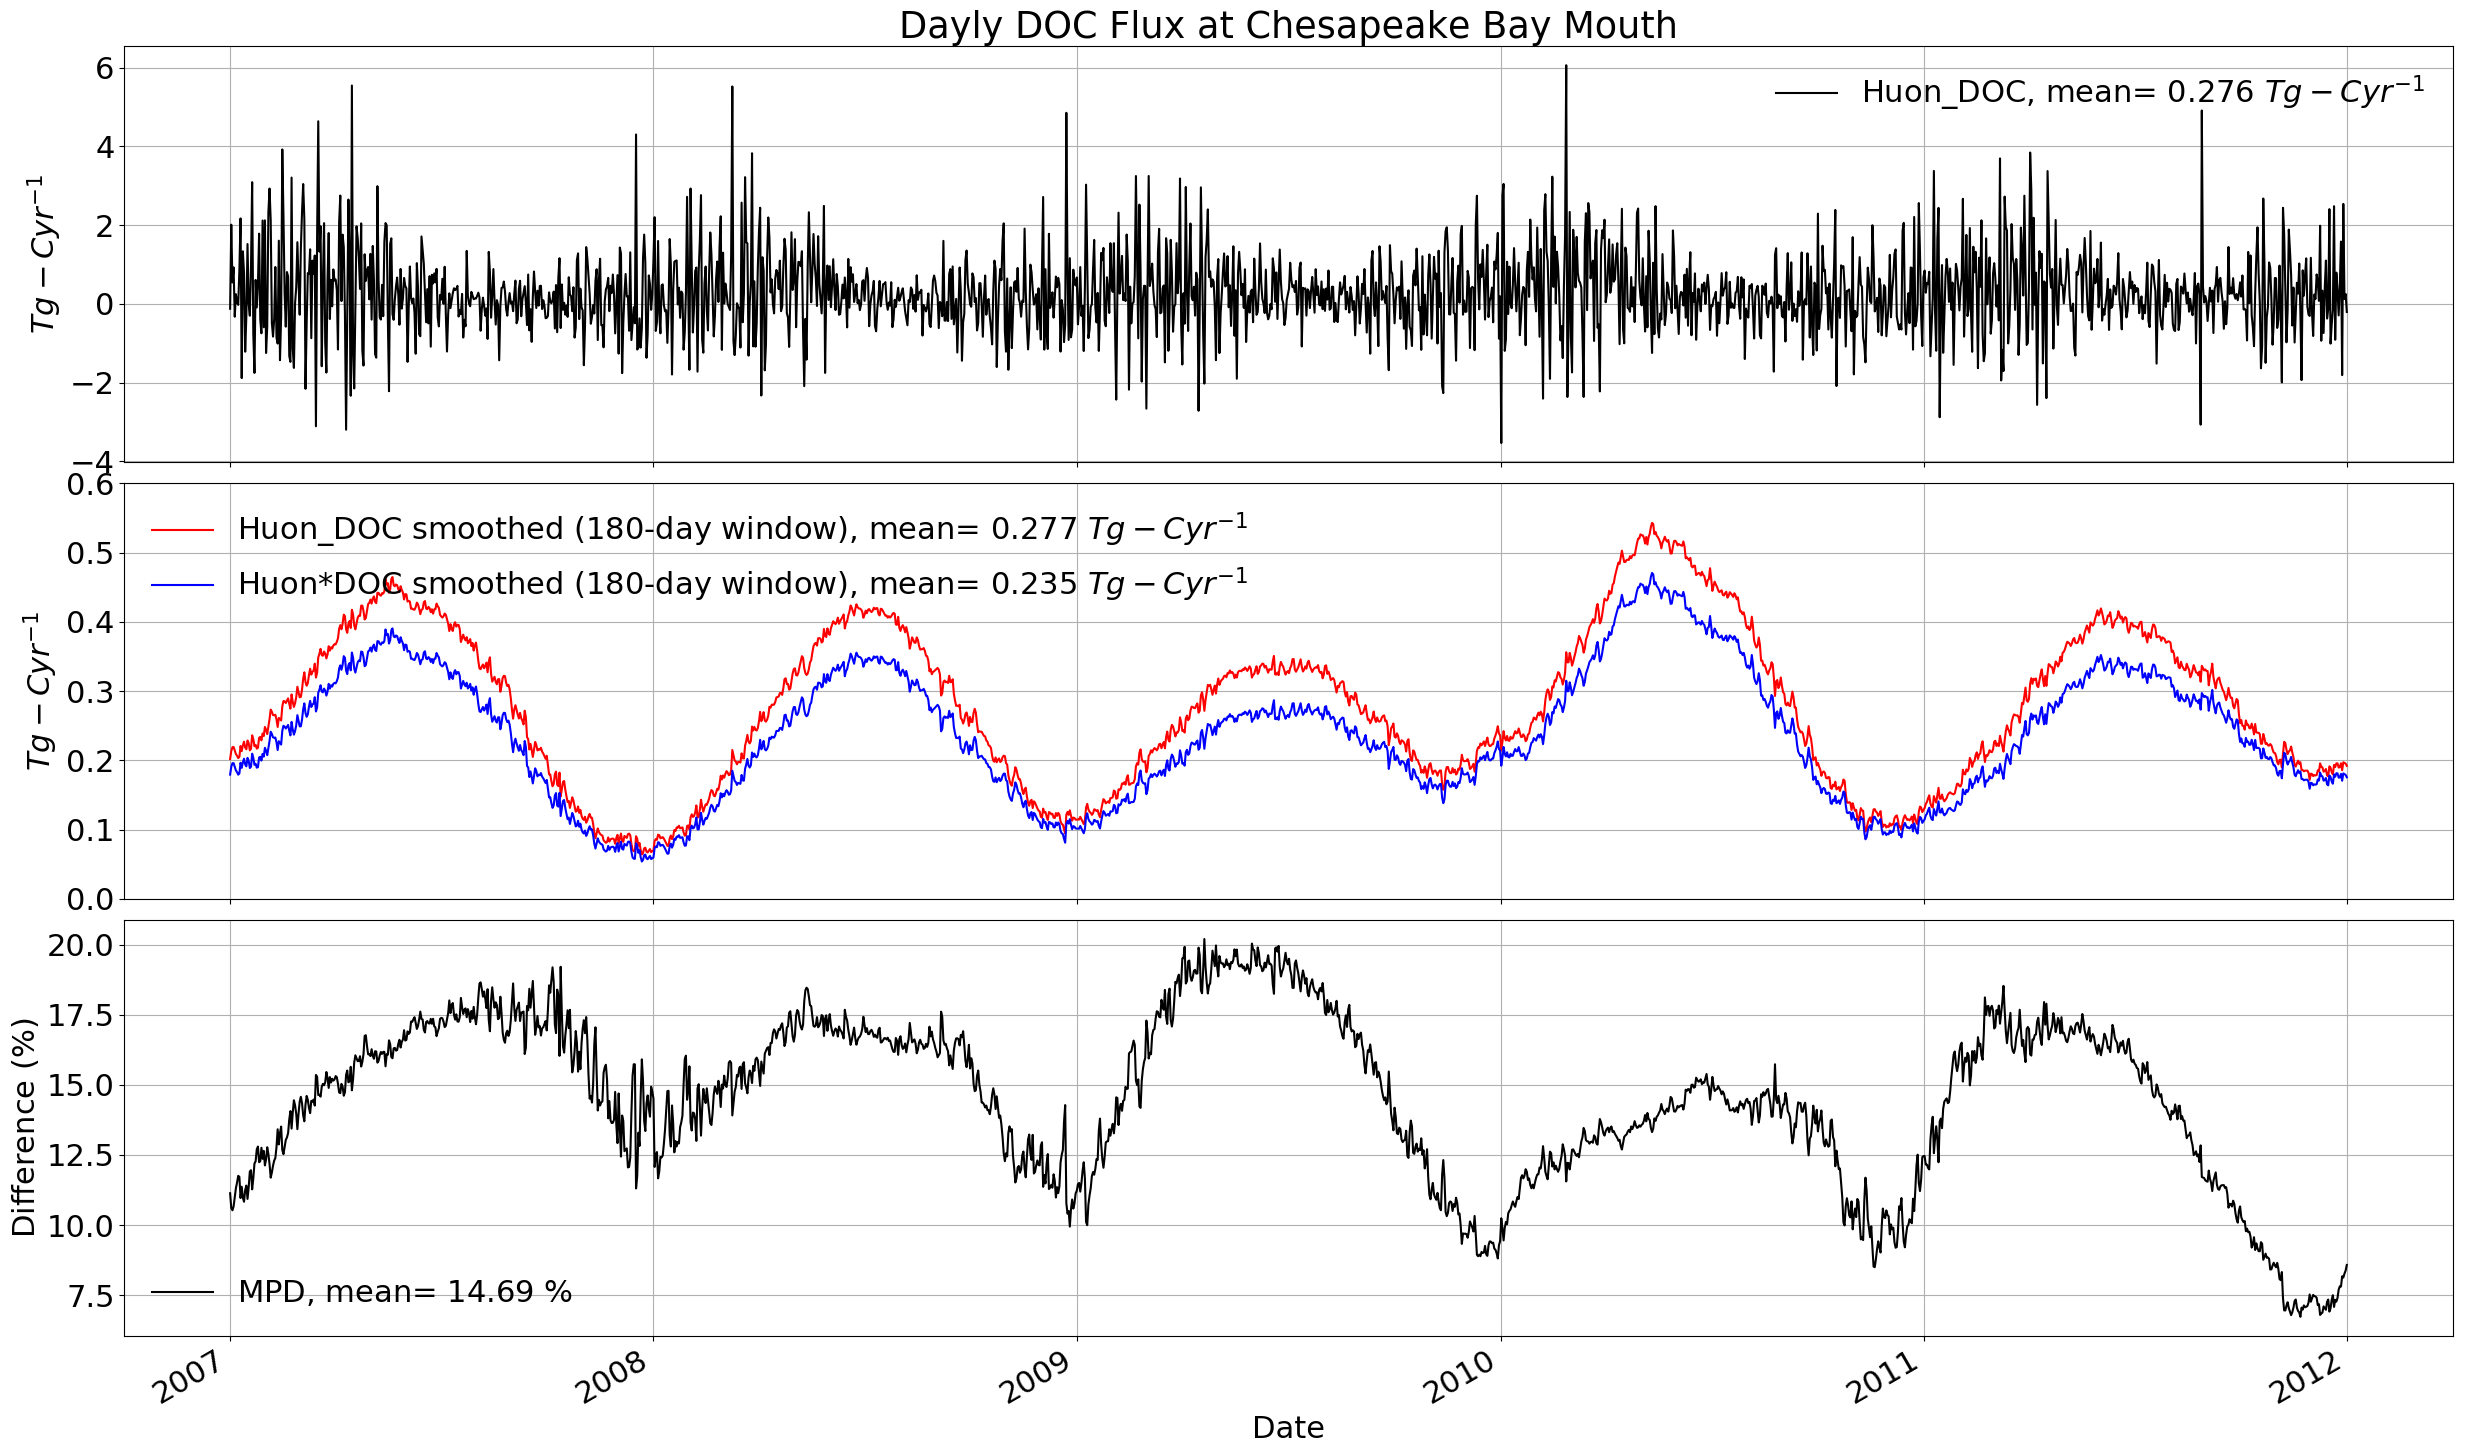

In [28]:
# plotting time series of DOC flux
sm=sum_Huon_DOC.rolling(ocean_time=window).mean()

f, ax = pl.subplots(nrows=3, sharex=True, figsize=(25, 15))
# Daily Huon_DOC
yplot1 = sum_Huon_DOC.sel(ocean_time=slice('2007','2011'))
yplot1.plot.line( 'k-',
    label=f'Huon_DOC, mean={float(yplot1.mean()): .3f}' + ' $Tg-C yr^{-1}$', ax=ax[0])
ax[0].set_ylabel('$Tg-C yr^{-1}$')
ax[0].legend(frameon=False)
ax[0].set_title('Dayly DOC Flux at Chesapeake Bay Mouth')
ax[0].grid()
# Huon_DOC smoothed with rolling averages
yplot2 = sm.sel(ocean_time=slice('2007','2011'))
yplot2.plot.line('r-',
    label=f'Huon_DOC smoothed ({window}-day window), mean={float(yplot2.mean()): .3f}' +
    ' $Tg-C yr^{-1}$', ax=ax[1])
ax[1].set_ylim([0,0.6])
ax[1].set_ylabel('$Tg-C yr^{-1}$')
ax[1].legend(frameon=False);
yplot3 = sm_HuonDOC.sel(ocean_time=slice('2007','2011'))
# Huon*DOC smoothed with rolling averages
yplot3.plot.line('b-',
    label=f'Huon*DOC smoothed ({window}-day window), mean={float(yplot3.mean()): .3f}' +
    ' $Tg-C yr^{-1}$', ax=ax[1])
ax[1].set_ylim([0,0.6])
ax[1].set_ylabel('$Tg-C yr^{-1}$')
ax[1].set_xlabel('Date')
ax[1].legend(frameon=False);
ax[1].grid()
# Difference between the two methos
MPD = 100*(sm - sm_HuonDOC)/sm
yplot4 = MPD.sel(ocean_time=slice('2007','2011'))
yplot4.plot.line('k-',
    label=f'MPD, mean={float(MPD.mean()): .2f}' + ' $\%$', ax=ax[2])
ax[2].set_ylabel('Difference ($\%$)')
ax[2].set_xlabel('Date')
ax[2].legend(frameon=False)
ax[2].grid()
f.tight_layout(h_pad=0.01)
f.savefig('Figures/Huon_DOCflux_CBM.png',dpi=300)


In [29]:
mean_DOC = DOC.mean(dim=['s_rho', 'eta_rho'])

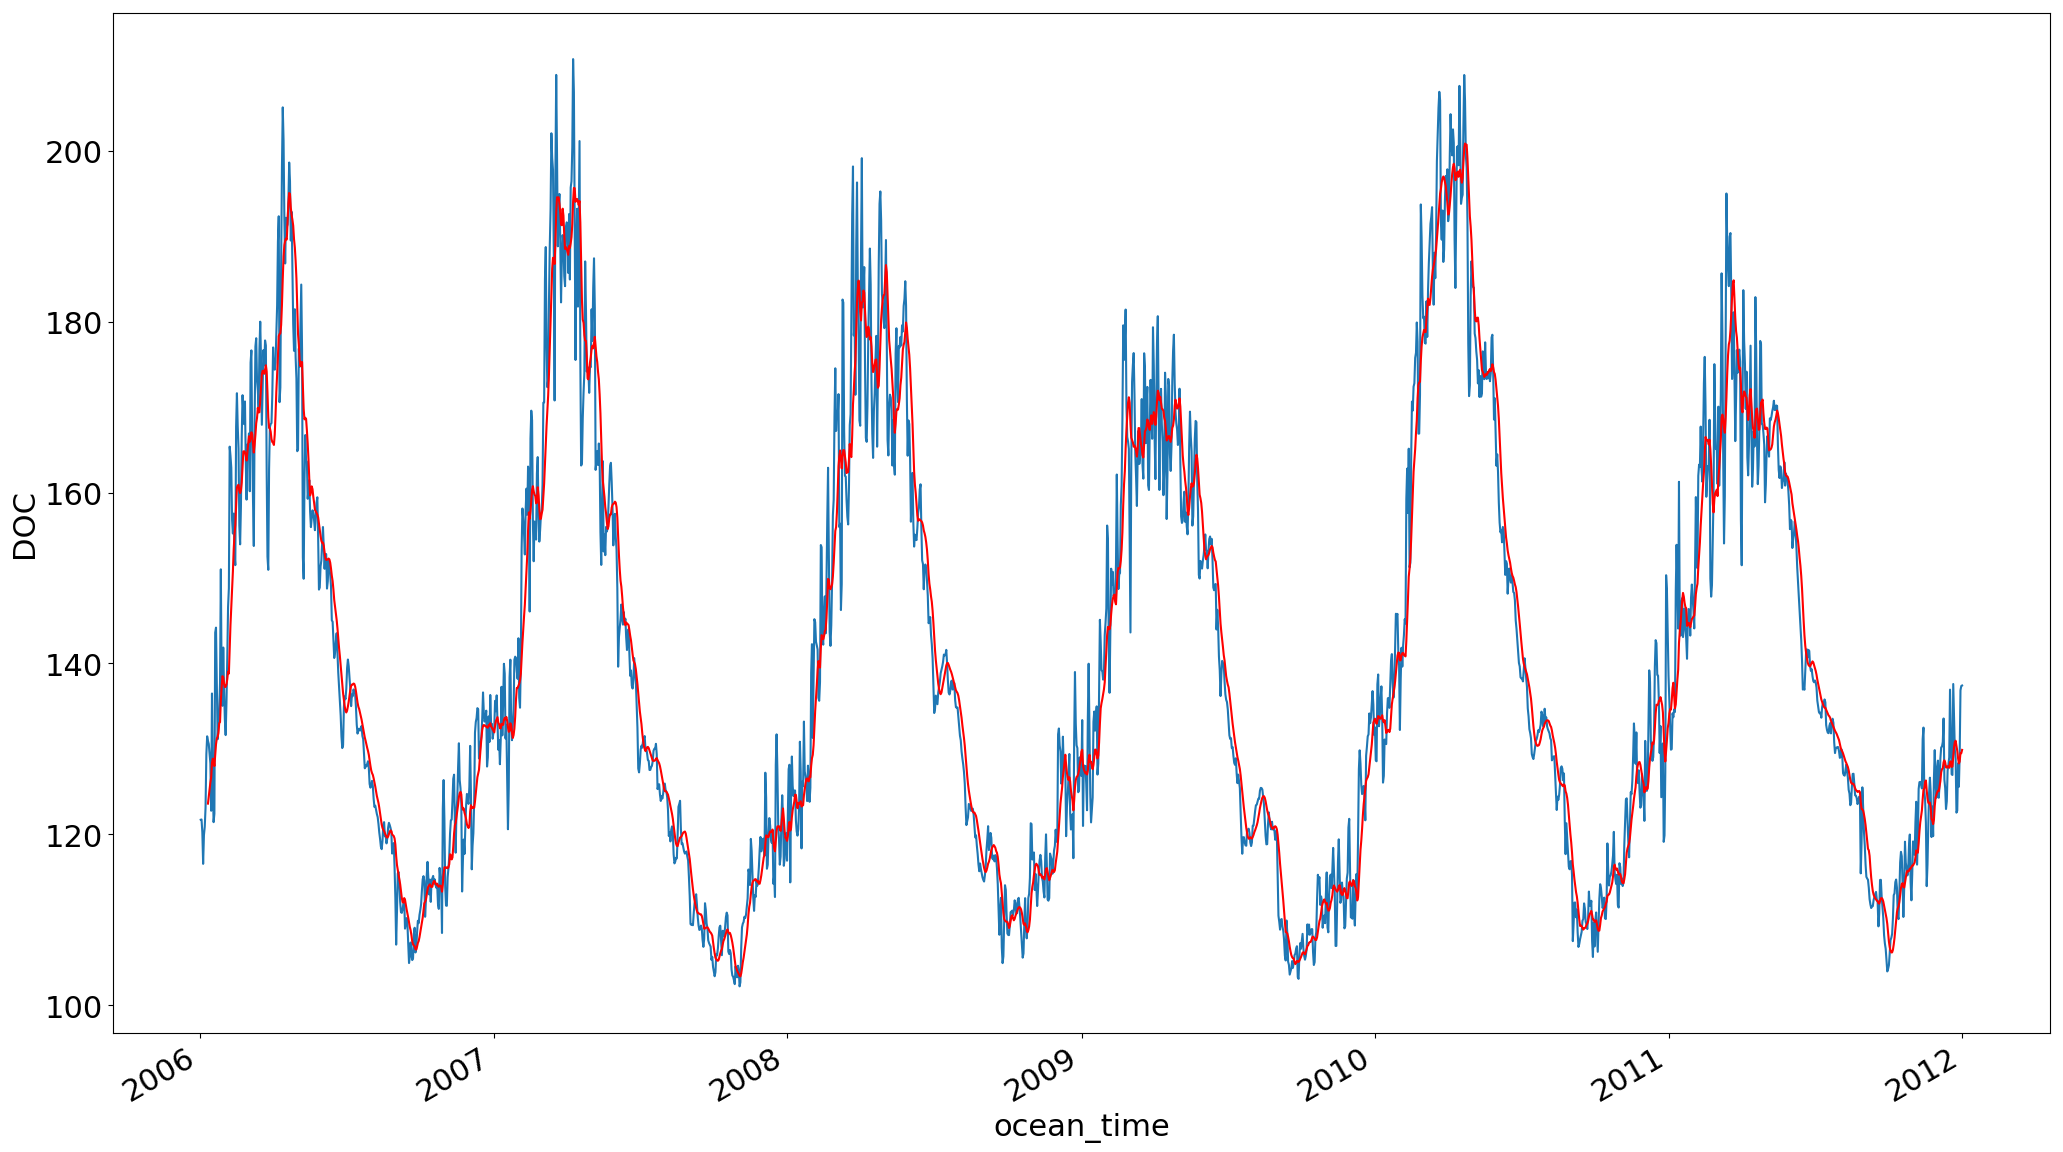

In [31]:
# plotting time series
f, ax=pl.subplots(figsize=(25, 15))
# raw time series
mean_DOC.plot.line(ax=ax);
#rolling mean:
sm=mean_DOC.rolling(ocean_time=10).mean()
# smoothed time series (10day rolling window)
sm.plot.line(ax=ax, color='r')

In [49]:
# get 8-day time averages for all data arrays
ds8D = ds[['Huon', 'DOC', 'salt', 'temp']].resample(ocean_time='8D').mean('ocean_time')
Huon8D = ds8D.Huon
DOC8D = ds8D.DOC
salt8D = ds8D.salt
temp8D = ds8D.temp
# get Huon8D*DOC8D
Huon8DxDOC8D = np.multiply(Huon8D, DOC8D)
DOCflux8D = Huon8DxDOC8D.sum(dim=['s_rho', 'eta_u'])
# m3/s x mmol-C/m3 to Tg-C/yr
DOCflux8D = DOCflux8D*12*1e-3*86400*365*1e-12

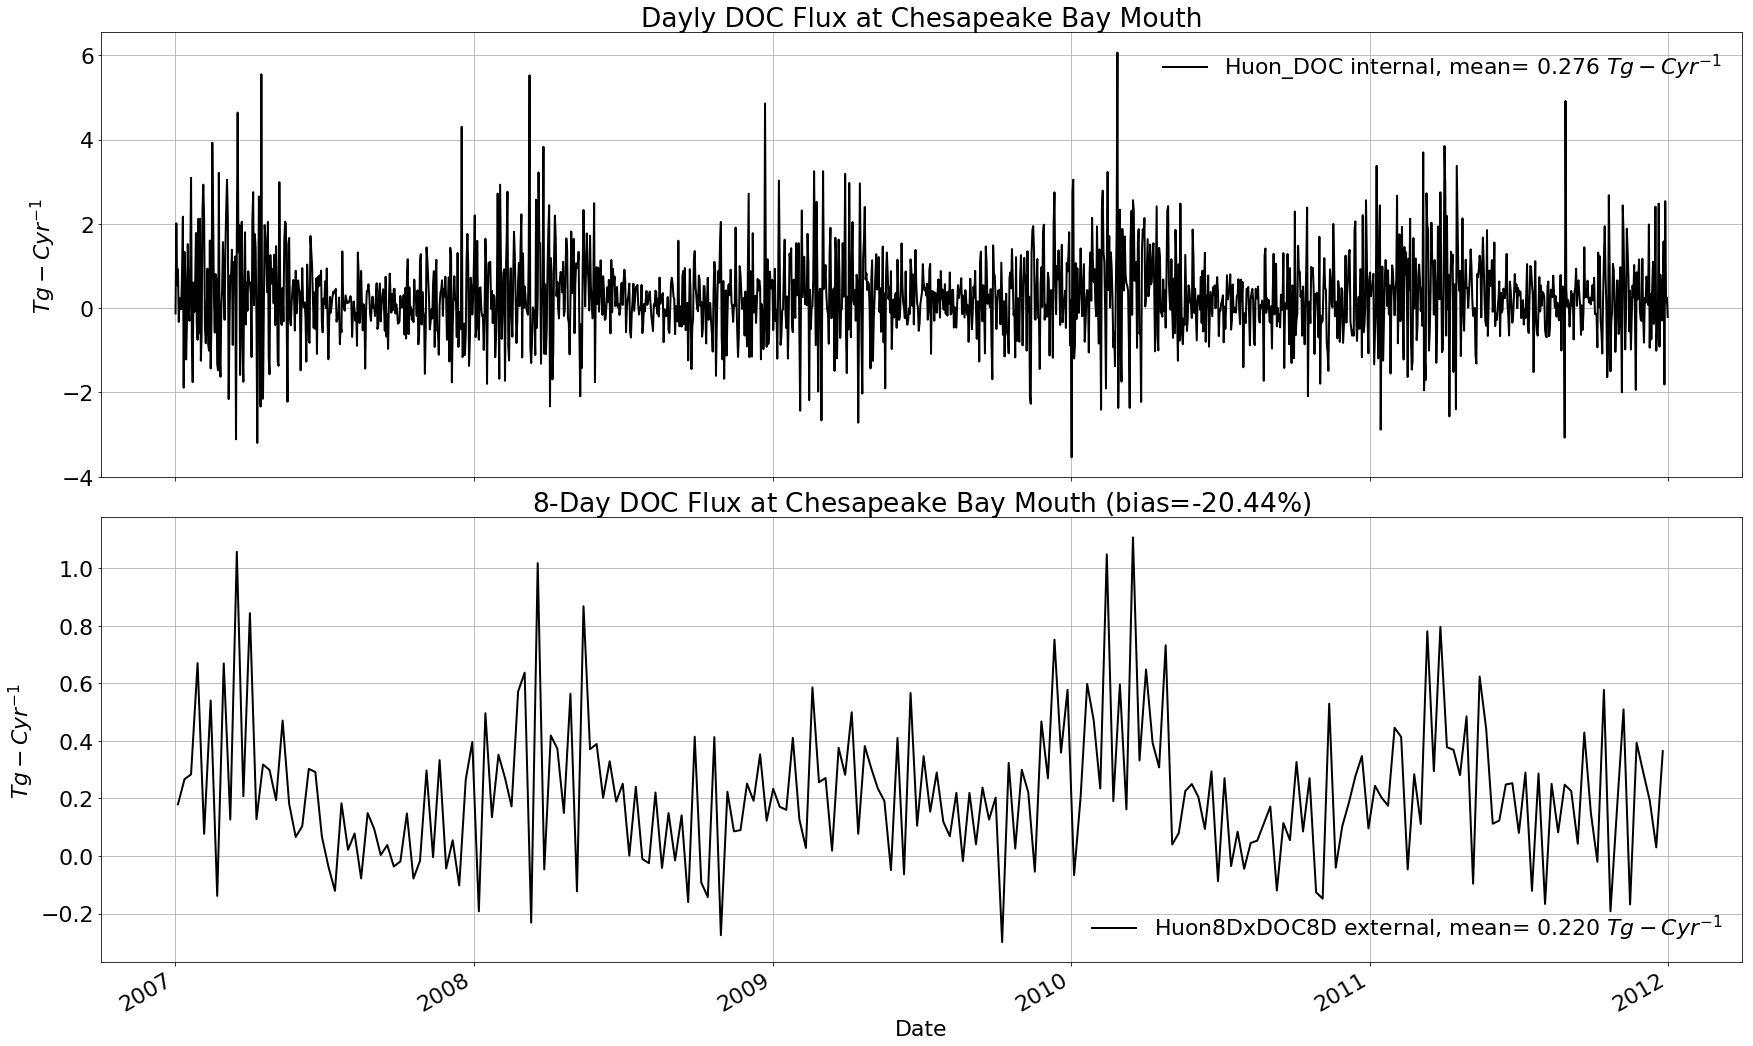

In [81]:
# plot daily internal DOC flux vs external 8-day DOC flux
f, ax = pl.subplots(nrows=2, sharex=True, figsize=(25, 15))
# Daily Huon_DOC
yplot1 = sum_Huon_DOC.sel(ocean_time=slice('2007','2011'))
yplot1.plot.line( 'k-',
    label=f'Huon_DOC internal, mean={float(yplot1.mean()): .3f}' + ' $Tg-C yr^{-1}$', ax=ax[0])
ax[0].set_ylabel('$Tg-C yr^{-1}$')
ax[0].legend(frameon=False)
ax[0].set_title('Dayly DOC Flux at Chesapeake Bay Mouth')
ax[0].grid()
# Huon8D*DOC8D 
yplot2 = DOCflux8D.sel(ocean_time=slice('2007','2011'))
yplot2.plot.line('k-',
    label=f'Huon8DxDOC8D external, mean={float(yplot2.mean()): .3f}' +
    ' $Tg-C yr^{-1}$', ax=ax[1])
ax[1].set_ylabel('$Tg-C yr^{-1}$')
ax[1].legend(frameon=False);
#ax[1].set_ylim([0,0.6])
ax[1].set_ylabel('$Tg-C yr^{-1}$')
ax[1].set_xlabel('Date')
ax[1].legend(frameon=False);
# percent difference
mn1d = yplot1.mean()
mn8d = yplot2.mean()
pcdf = 100*(mn8d - mn1d)/mn1d
ax[1].set_title(f'8-Day DOC Flux at Chesapeake Bay Mouth (bias={float(pcdf): .2f}' + '$\%$)')
ax[1].grid()
f.tight_layout(h_pad=0.01)
f.savefig('Figures/Huon8DxDOC8Dflux_CBM.png',dpi=300)


In [45]:

mH8 = Huon8D.sum(dim=['s_rho', 'eta_u'])

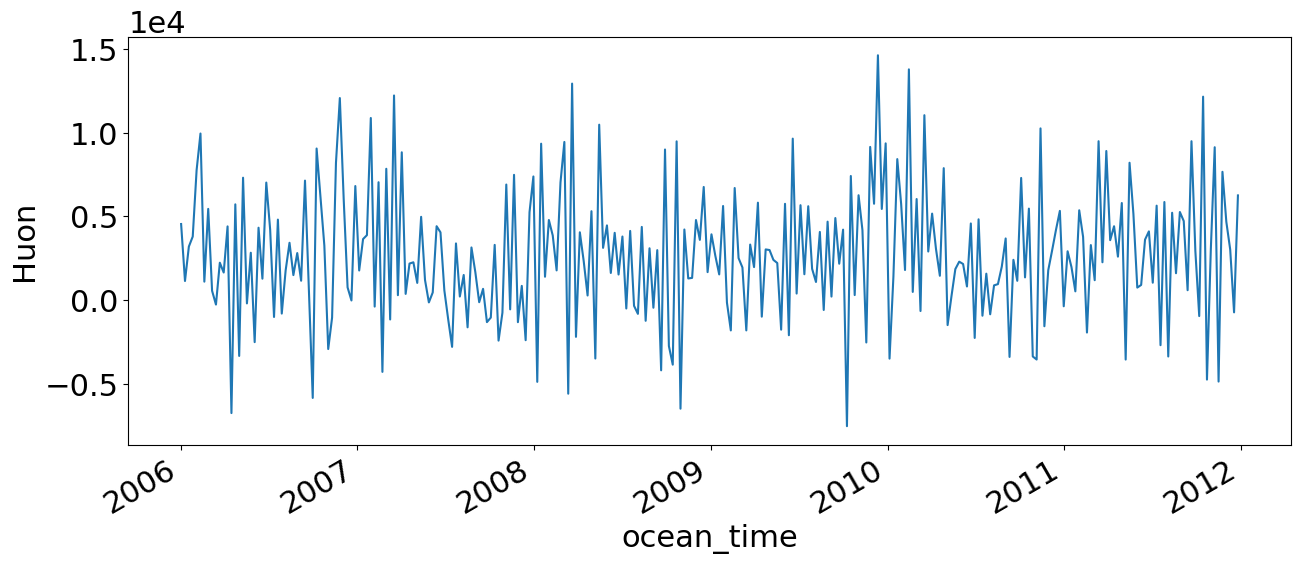

In [46]:
f, ax = pl.subplots(figsize=(15, 6))
mH8.plot(ax=ax)